In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [3]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
duplicates = df.duplicated().sum()
print(duplicates)

0


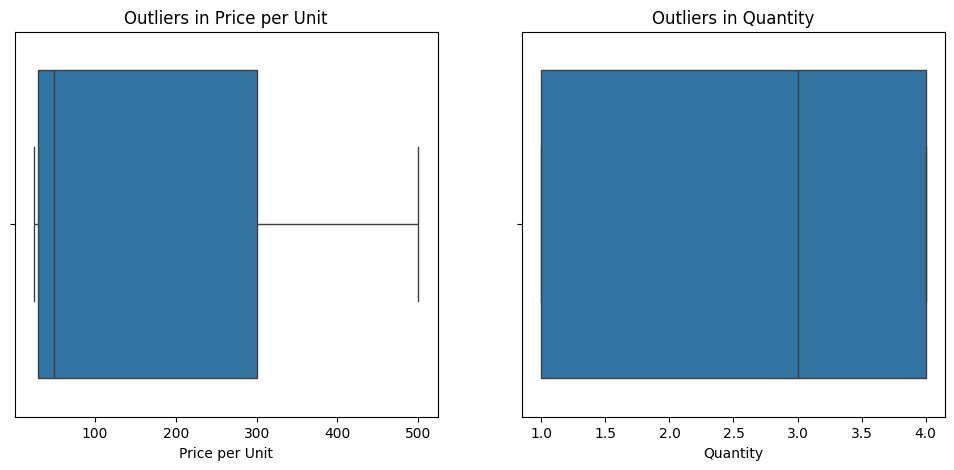

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df["Price per Unit"])
plt.title("Outliers in Price per Unit")

if "Quantity" in df.columns:
    plt.subplot(1,2,2)
    sns.boxplot(x=df["Quantity"])
    plt.title("Outliers in Quantity")

plt.show()

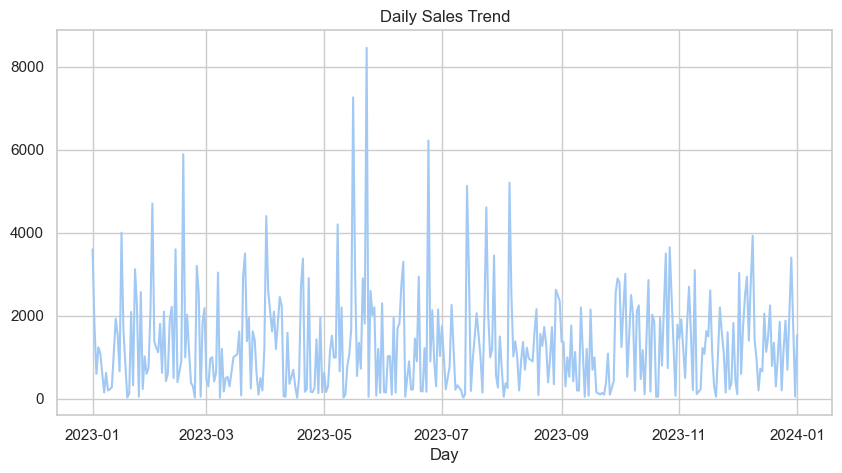

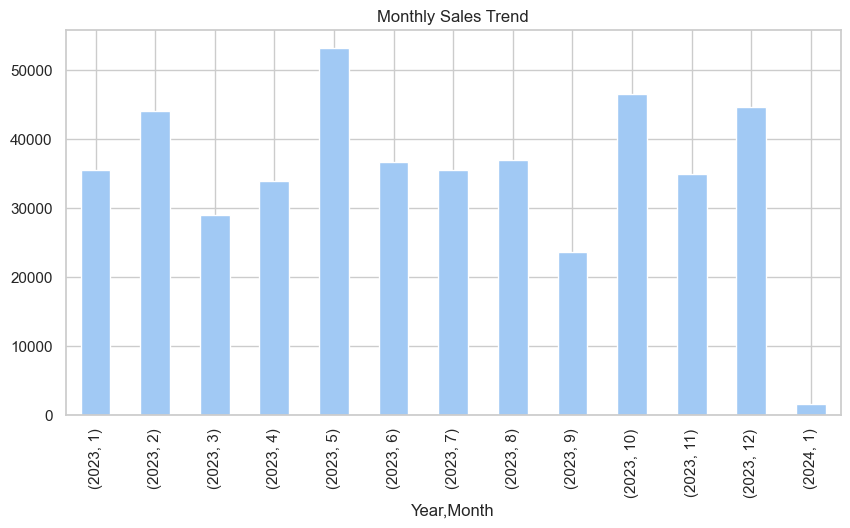

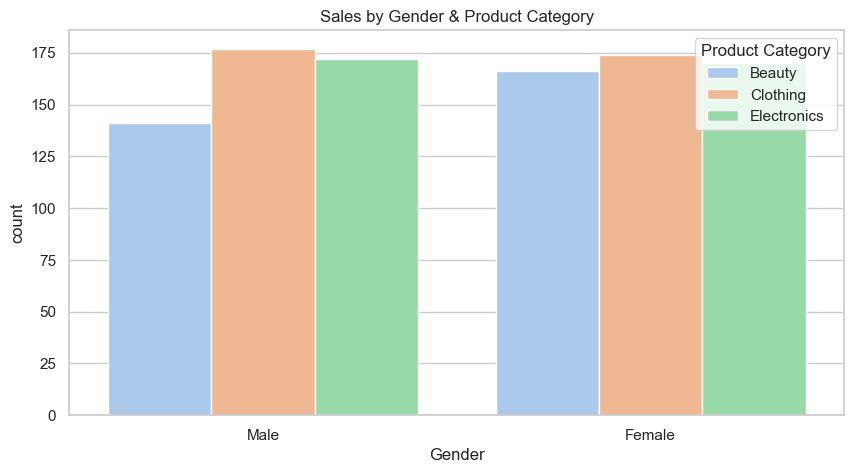

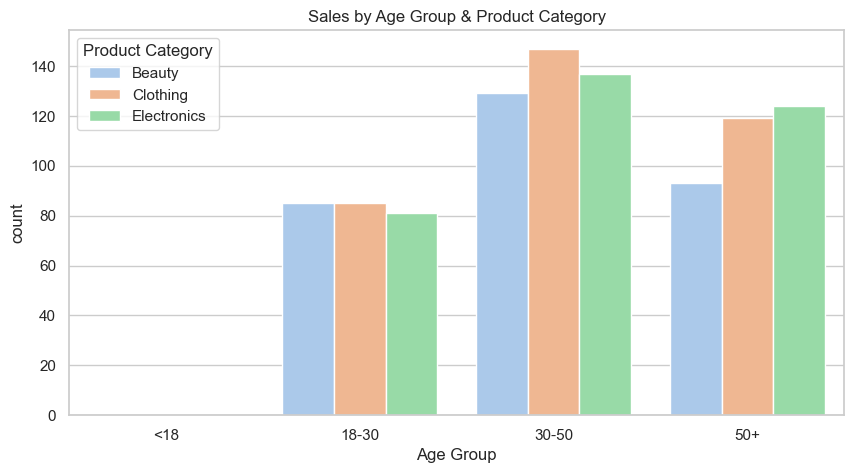

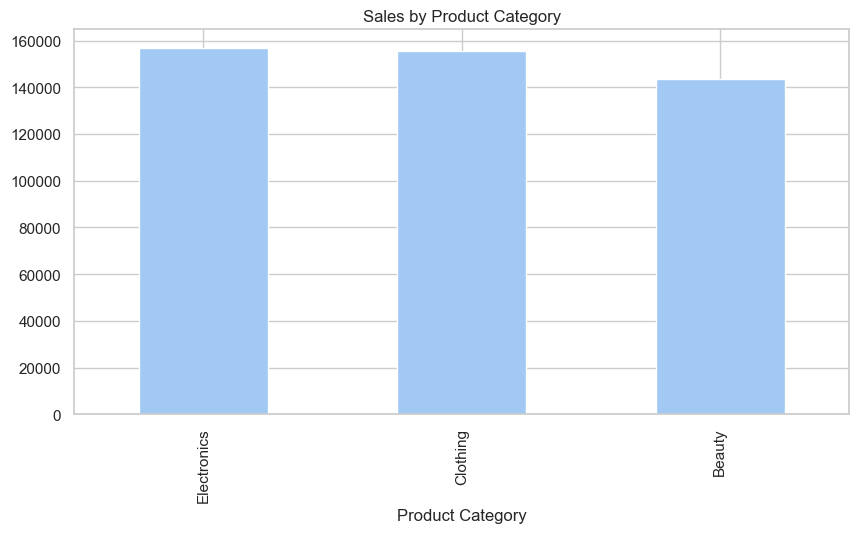

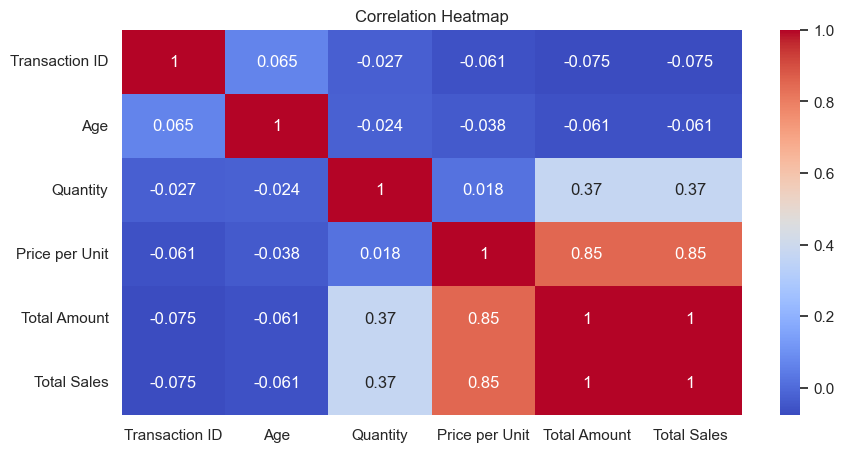

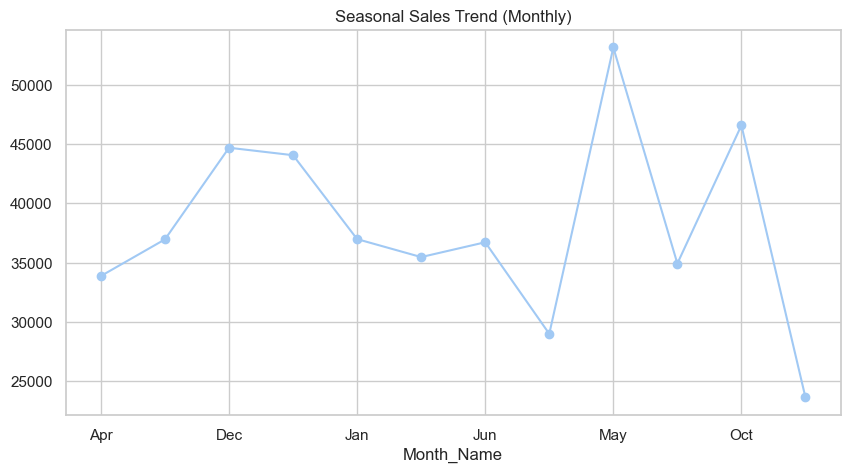

In [9]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10,5)


if "Quantity" in df.columns and "Price per Unit" in df.columns:
    df["Total Sales"] = df["Quantity"] * df["Price per Unit"]


if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.date

    
    daily_sales = df.groupby("Day")["Total Sales"].sum()
    daily_sales.plot(title="Daily Sales Trend")
    plt.show()

    
    monthly_sales = df.groupby(["Year","Month"])["Total Sales"].sum()
    monthly_sales.plot(kind="bar", title="Monthly Sales Trend")
    plt.show()



if "Gender" in df.columns:
    sns.countplot(x="Gender", data=df, hue="Product Category")
    plt.title("Sales by Gender & Product Category")
    plt.show()

if "Age" in df.columns:
    # Create Age Groups
    bins = [0, 18, 30, 50, 100]
    labels = ["<18", "18-30", "30-50", "50+"]
    df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

    sns.countplot(x="Age Group", data=df, hue="Product Category")
    plt.title("Sales by Age Group & Product Category")
    plt.show()

if "Region" in df.columns:
    region_sales = df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False)
    region_sales.plot(kind="bar", title="Sales by Region")
    plt.show()



# Top Selling Products
if "Product" in df.columns:
    top_products = df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False).head(10)
    top_products.plot(kind="bar", title="Top 10 Products by Sales")
    plt.show()

# Category Performance
if "Product Category" in df.columns:
    category_sales = df.groupby("Product Category")["Total Sales"].sum().sort_values(ascending=False)
    category_sales.plot(kind="bar", title="Sales by Product Category")
    plt.show()



# Check numerical correlations
corr = df.select_dtypes(include=["int64","float64"]).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



if "Date" in df.columns:
    df["Month_Name"] = df["Date"].dt.strftime("%b")
    monthly_trend = df.groupby("Month_Name")["Total Sales"].sum()
    monthly_trend.plot(kind="line", marker="o", title="Seasonal Sales Trend (Monthly)")
    plt.show()


In [10]:
df.head(20)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total Sales,Year,Month,Day,Age Group,Month_Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,2023,11,2023-11-24,30-50,Nov
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,2023,2,2023-02-27,18-30,Feb
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,2023,1,2023-01-13,50+,Jan
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,2023,5,2023-05-21,30-50,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,2023,5,2023-05-06,30-50,May
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30,2023,4,2023-04-25,30-50,Apr
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,50,2023,3,2023-03-13,30-50,Mar
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,100,2023,2,2023-02-22,30-50,Feb
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,600,2023,12,2023-12-13,50+,Dec
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,200,2023,10,2023-10-07,50+,Oct
